In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
mnist_train = pd.read_csv('sample_data/mnist_train_small.csv', header=None)

(20000, 785)


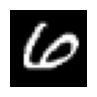

0


In [32]:
print(mnist_train.shape)

img = mnist_train.iloc[0, 1:].values.reshape(28, 28)  # reshape(28, 28)해서 이미지로 볼 수 있게 함
plt.figure(figsize=(1, 1))
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

print(mnist_train.iloc[0, 1:].values[0])

In [40]:
# 데이터 준비
from sklearn.model_selection import train_test_split

X = mnist_train.iloc[:, 1:].values
y = mnist_train.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
np.unique(y, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([1962, 2243, 1989, 2021, 1924, 1761, 2039, 2126, 1912, 2023]))

In [41]:
# 모델 학습 1
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

rfc.score(X_train, y_train), rfc.score(X_test, y_test)

(1.0, 0.9534)

In [45]:
# 모델 학습 2-1 - 신경망 사용
# from sklearn.neural_network import MLPClassifier
import tensorflow as tf
from tensorflow import keras as tf_keras
import keras

# tf_keras.models.Sequential
model = tf_keras.Sequential([
    tf_keras.layers.Input(shape=(784, )),               # 입력층 784인 이유는 28*28 > 이때는 데이터 그 자체
    tf_keras.layers.Dense(512, activation = 'relu'),    # 1번 중간층
    tf_keras.layers.Dense(256, activation = 'relu'),    # 2번 중간층
    tf_keras.layers.Dense(10, activation = 'softmax')]) # softmax는 출력층

In [46]:
# 모델 학습 2-2
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 535,818 (2.04 MB)

 Trainable params: 535,818 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

In [47]:
784*512+512

401920

In [54]:
# 모델 학습 2-3
model.compile(loss='sparse_categorical_crossentropy', # 손실 계산 방법 = 손실함수
              optimizer='adam',                       # 옵티마이저 = 최적화 방법 > 아담이 성능이 제일 좋음
              metrics=['accuracy'])                   # 모델평가 방법을 정확도로 하겠다는 것

model.fit(X_train, y_train, batch_size=256, epochs=20, validation_split=0.2)

Epoch 1/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.9943 - loss: 0.0309 - val_accuracy: 0.9533 - val_loss: 0.8473
Epoch 2/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9899 - loss: 0.0759 - val_accuracy: 0.9587 - val_loss: 0.7916
Epoch 3/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9897 - loss: 0.0947 - val_accuracy: 0.9550 - val_loss: 0.6868
Epoch 4/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9931 - loss: 0.0416 - val_accuracy: 0.9570 - val_loss: 0.9334
Epoch 5/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9935 - loss: 0.0377 - val_accuracy: 0.9507 - val_loss: 0.9122
Epoch 6/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9906 - loss: 0.0852 - val_accuracy: 0.9533 - val_loss: 0.8838
Epoch 7/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9905 - loss: 0.0723 - val_accuracy: 0.9603 - val_loss: 0.7295
Epoch 8/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9915 - loss: 0.0476 - val_accuracy: 0.9530 - v

In [55]:
# 3. 모델 검증 (테스트)

model.evaluate(X_test, y_test)

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9602 - loss: 0.7938


[0.795589804649353, 0.9611999988555908]

In [58]:
# 예측 실행

predicted_values = model.predict(X_test[:10])

predicted_values2 = predicted_values.argmax(axis=1)
print(predicted_values2)

(predicted_values2 == y_test[:10]).sum()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
[4 0 8 1 1 2 9 0 4 9]


10